# Titanic Endeavour

This notebook is my personal endeavour in understanding _exploratory analysis_ of tabular data. This note is using data from [kaggle](https://www.kaggle.com/competitions/titanic/overview).

Exploratory Data Analysis or EDA is the process of figuring out what the data can tell us and we use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis. 

- Features are available in the dataset?
- Which features are categorical?
- Which features are numerical?
- Which features contain blank, null or empty values?
- Which features are mixed data types?
- features may contain errors or typos?
- data types for various features?

https://cloud.google.com/vertex-ai/docs/tabular-data/bp-tabular

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [3]:
print(train_df.columns.values, test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked'] ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [4]:
# Check whether both data frame are equal or not
print(train_df.equals(test_df))

False


> Note: seem that in _**test_df**_, there is no _**"survived"**_ column

In [5]:
# preview the data
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**Univariate Analysis** =  is a type of data visualization where we visualize only a single variable at a time. Univariate Analysis helps us to analyze the distribution of the variable present in the data so that we can perform further analysis.

- histogram
- Bar Chart
- Pie Chart

**Bivariate analysis** = is the simultaneous analysis of two variables. It explores the concept of the relationship between two variable whether there exists an association and the strength of this association or whether there are differences between two variables and the significance of these differences.

The main three types we will see here are:

- Categorical vs Numerical => barplot
- Numerical Vs Numerical => scatterplot
- Categorical Vs Categorical data => countplot

**Multivariate Analysis** = extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them. Multivariate Analysis is a set of statistical model that examine patterns in multidimensional data by considering at once, several data variable.

- PCA scatterplot

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated ?. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

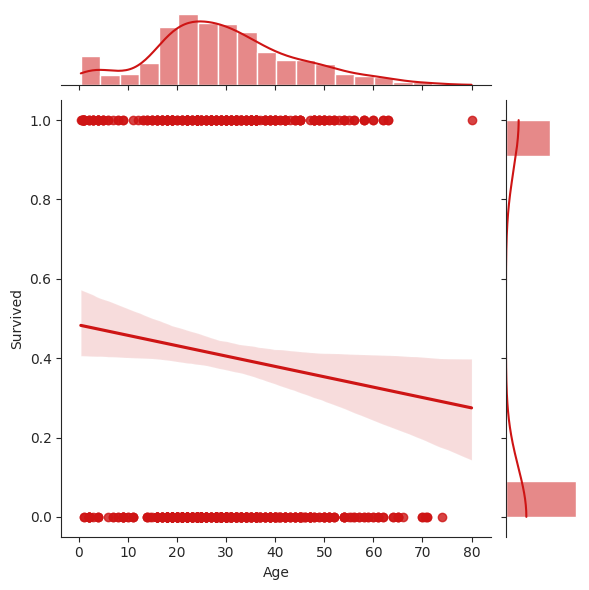

In [28]:
sns.jointplot(x='Age',y='Survived',data=train_df, kind="reg", color="#ce1414");

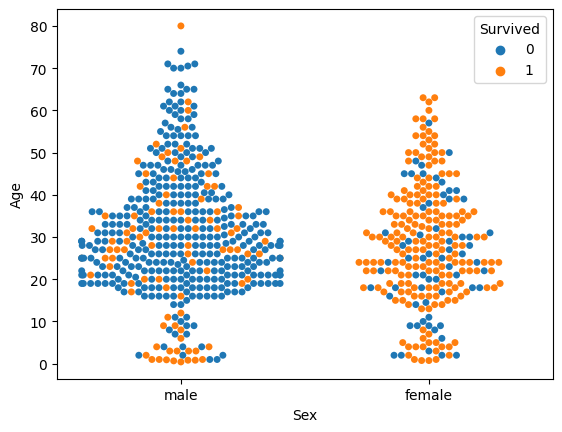

In [15]:
# ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
#  'Ticket' 'Fare' 'Cabin' 'Embarked']
# use this plot avoids overlapping points
sns.swarmplot(x="Sex", y="Age",hue="Survived", data=train_df)
plt.show()

## pairplot

- also called a **_scatterplot matrix_**

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n,2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

By default pairplot will return scatter plots in the main entries and a histogram in the diagonal. pairplot is oftentimes the first thing that a data scientist will throw at their data, and it works fantastically well in that capacity, even if sometimes the scatter-and-histogram approach isn't quite appropriate, given the data types.


The pairs plot builds on two basic figures, the histogram and the scatter plot. 
The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. 

This graph is more informative, but there are still some issues: I tend not to find stacked histograms, as on the diagonals, to be very interpretable. A better method for showing univariate (single variable) distributions from multiple categories is the density plot. 

https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

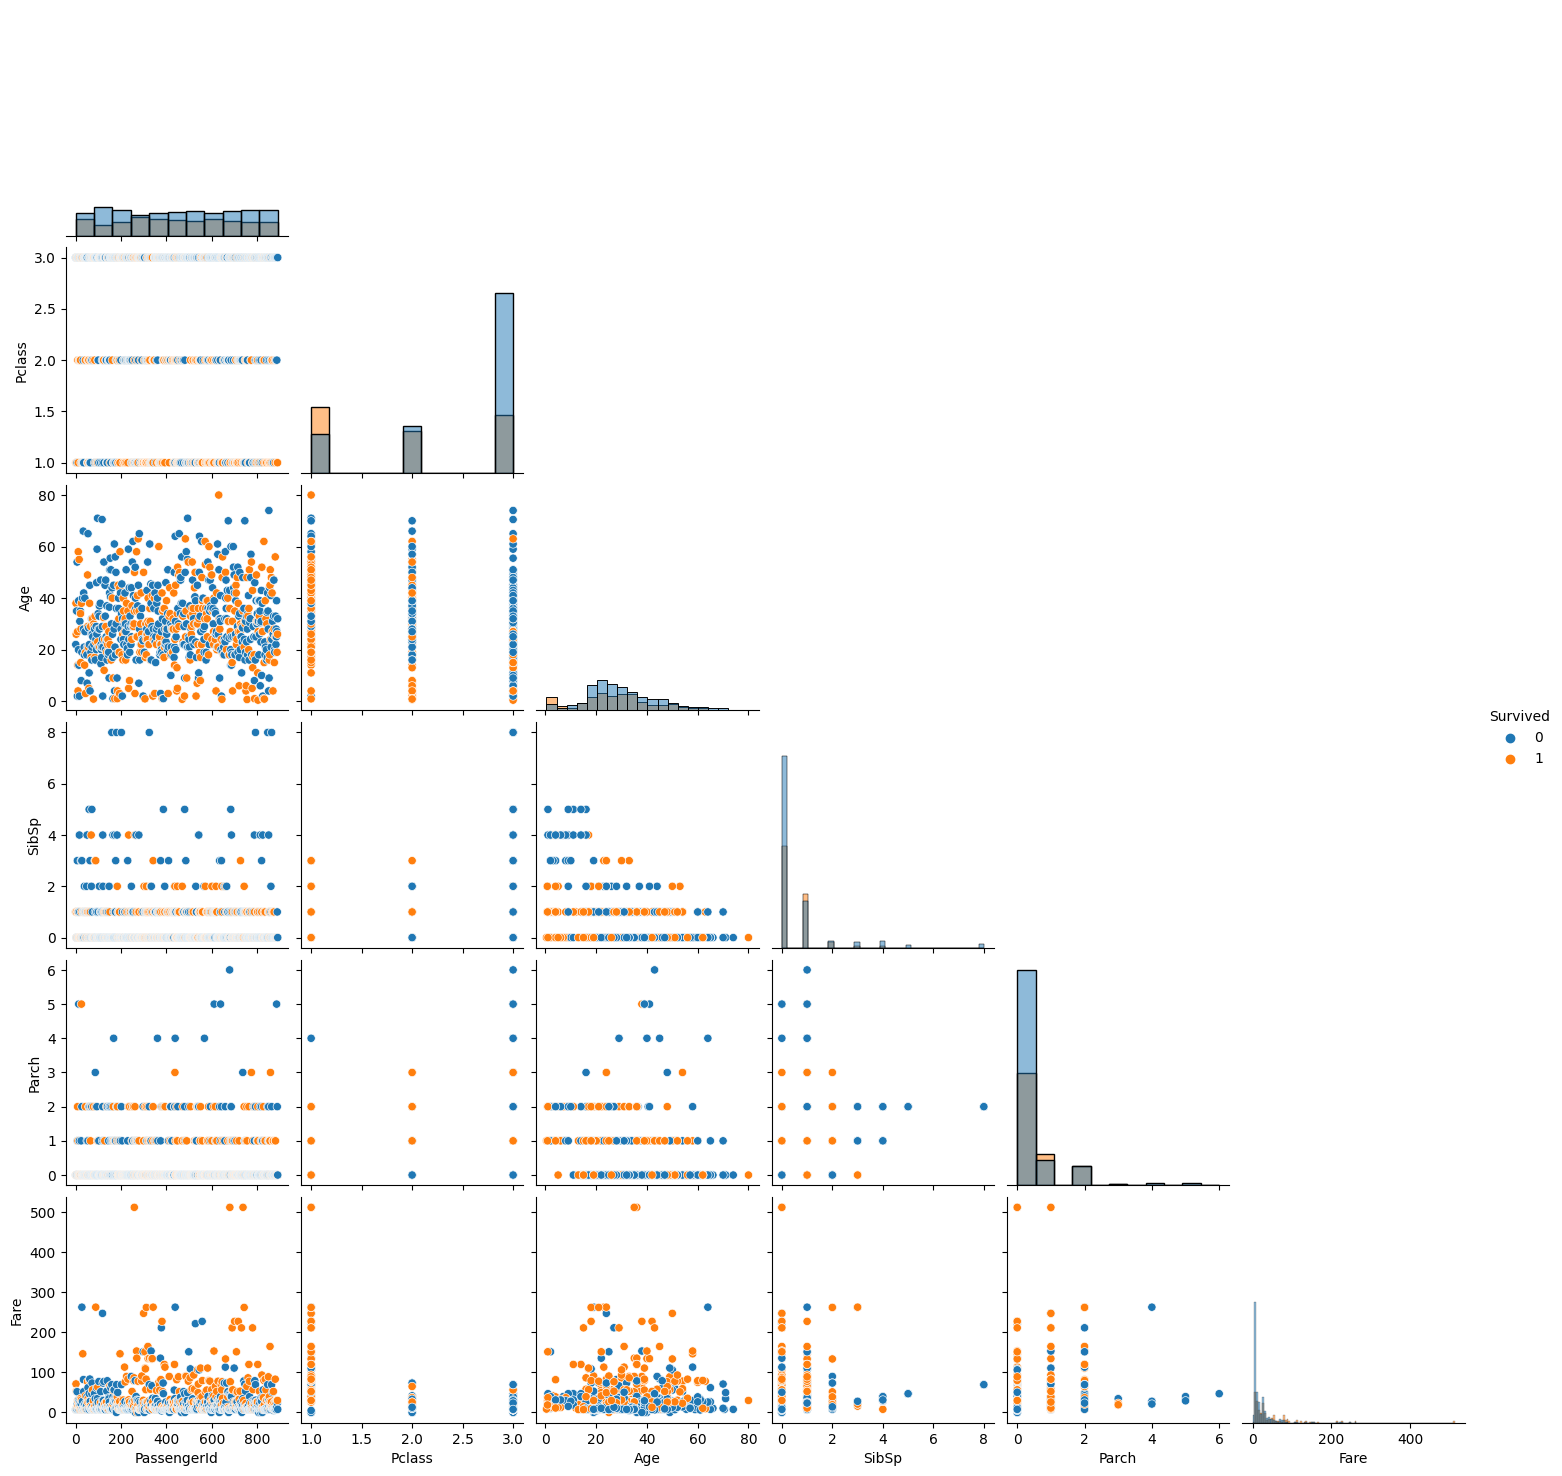

In [6]:
sns.pairplot(train_df, hue="Survived", diag_kind="hist", corner=True);

# https://medium.com/analytics-vidhya/my-journey-to-kaggle-competitions-grandmaster-status-titanic-baseline-a61ed3a31695

# https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6#:~:text=Pairplot%20visualizes%20given%20data%20to,attractive%20and%20informative%20statistical%20graphics.

# https://www.kaggle.com/code/willrice/python-seaborn-pairplot-example-notebook-version

# https://gist.github.com/mwaskom/8224591

# https://www.kaggle.com/code/roblexnana/data-viz-tutorial-with-titanic-and-seaborn

# https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22

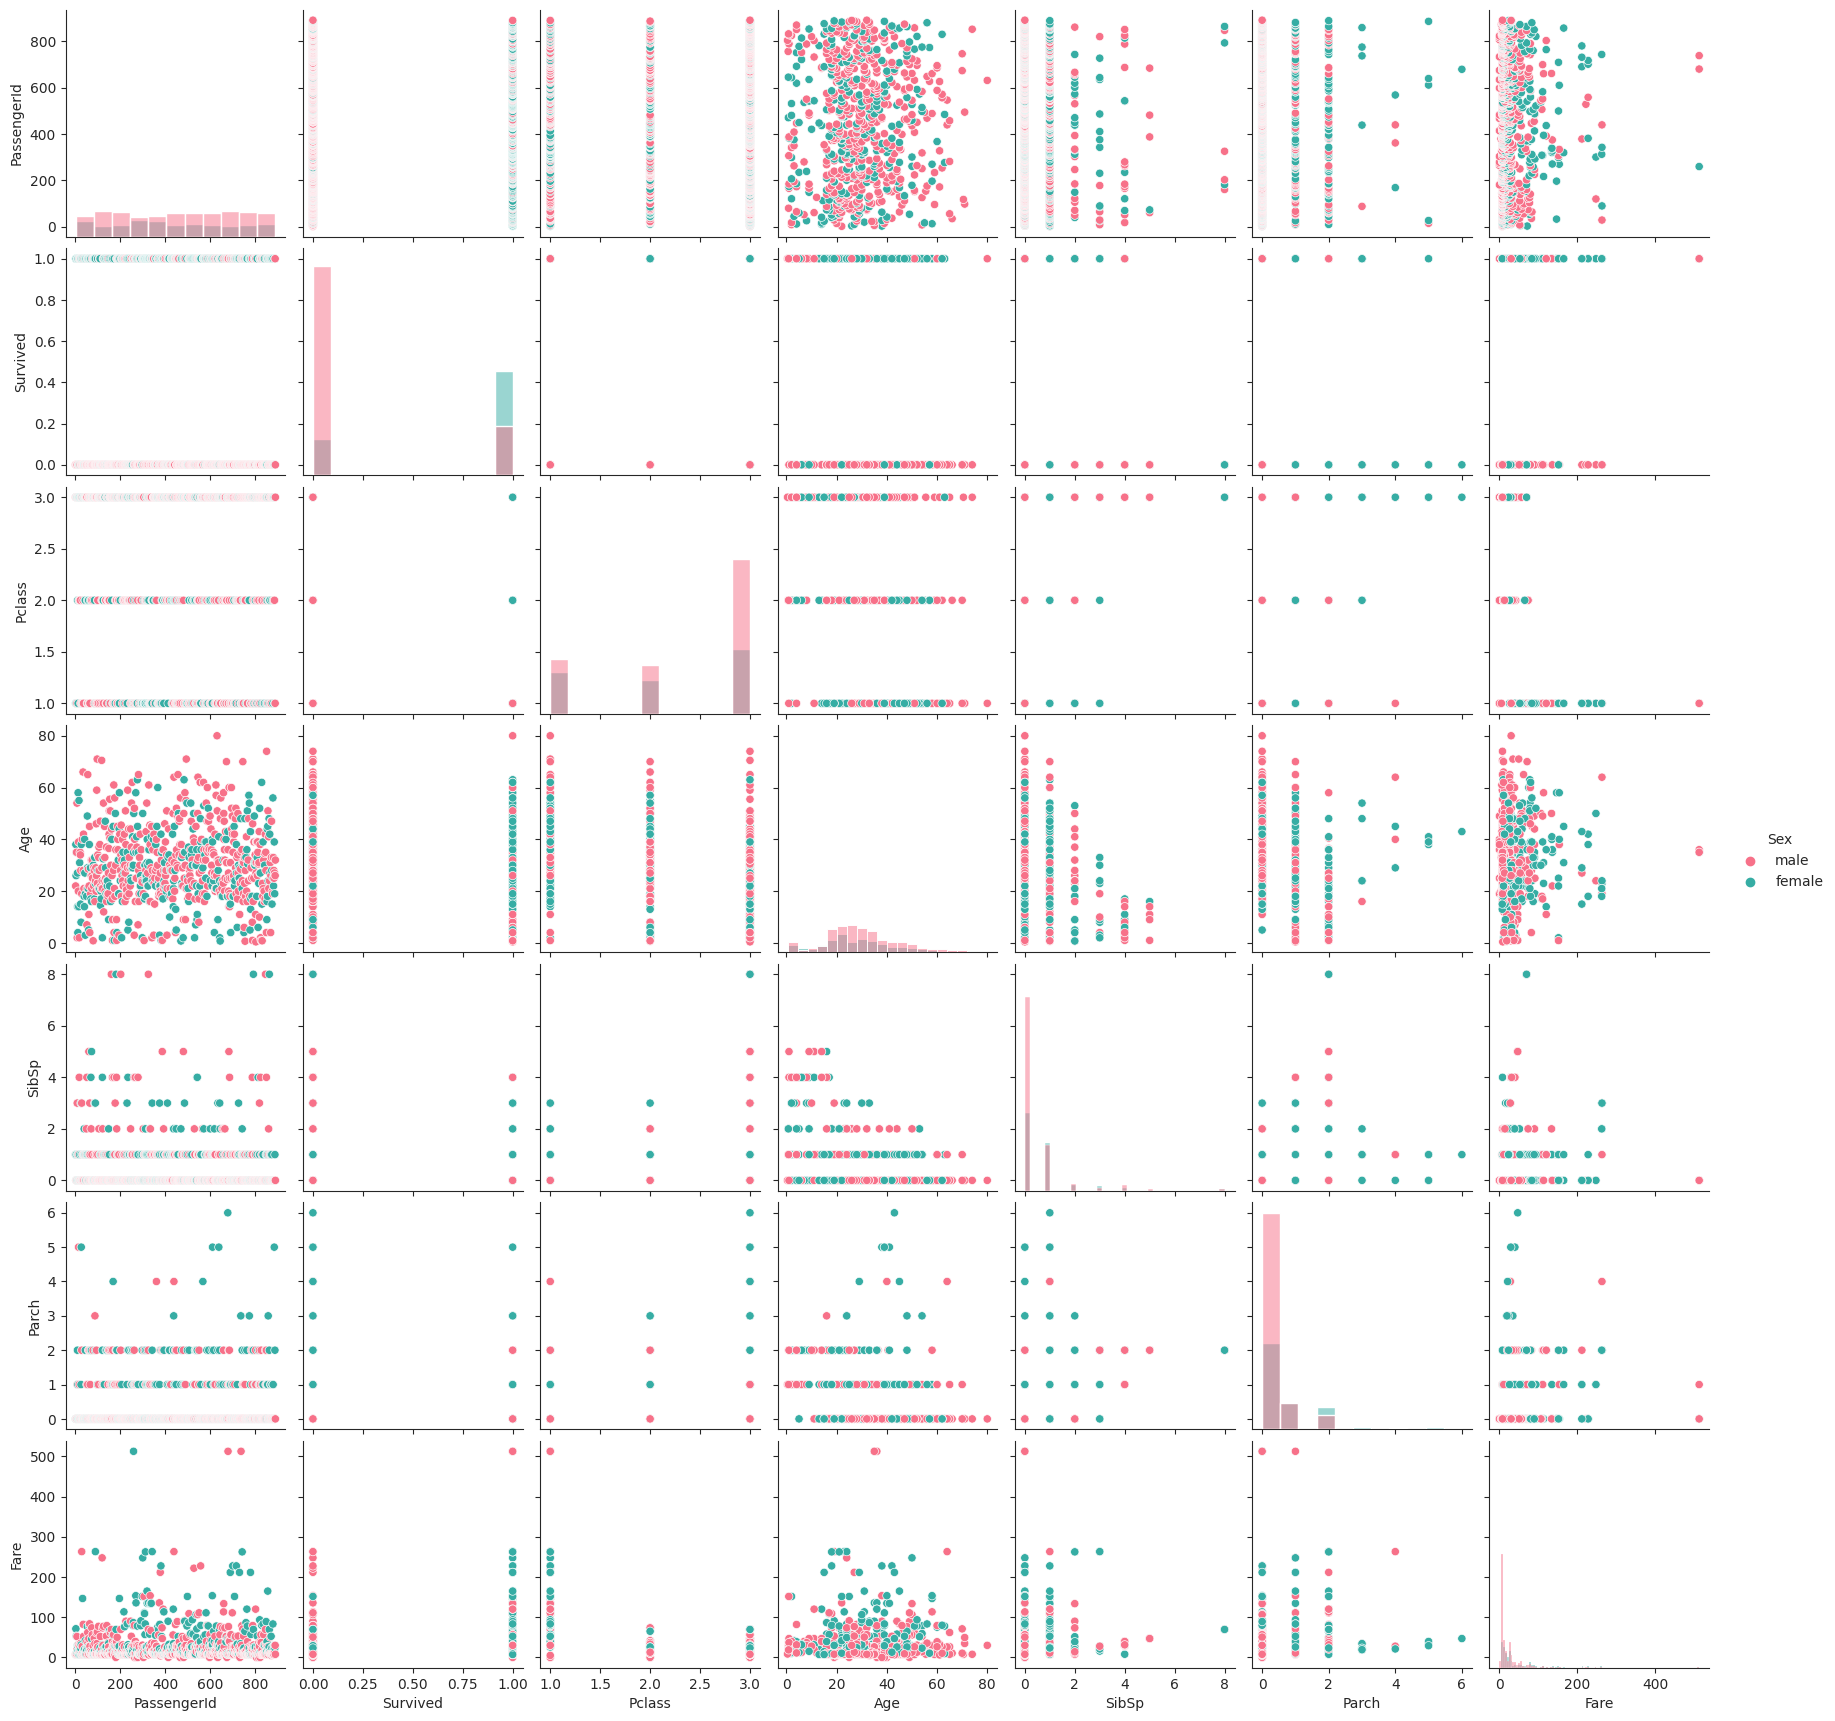

In [23]:
sns.set_style("ticks")
sns.pairplot(train_df, hue='Sex', diag_kind="hist", kind="scatter", palette="husl")
plt.show()

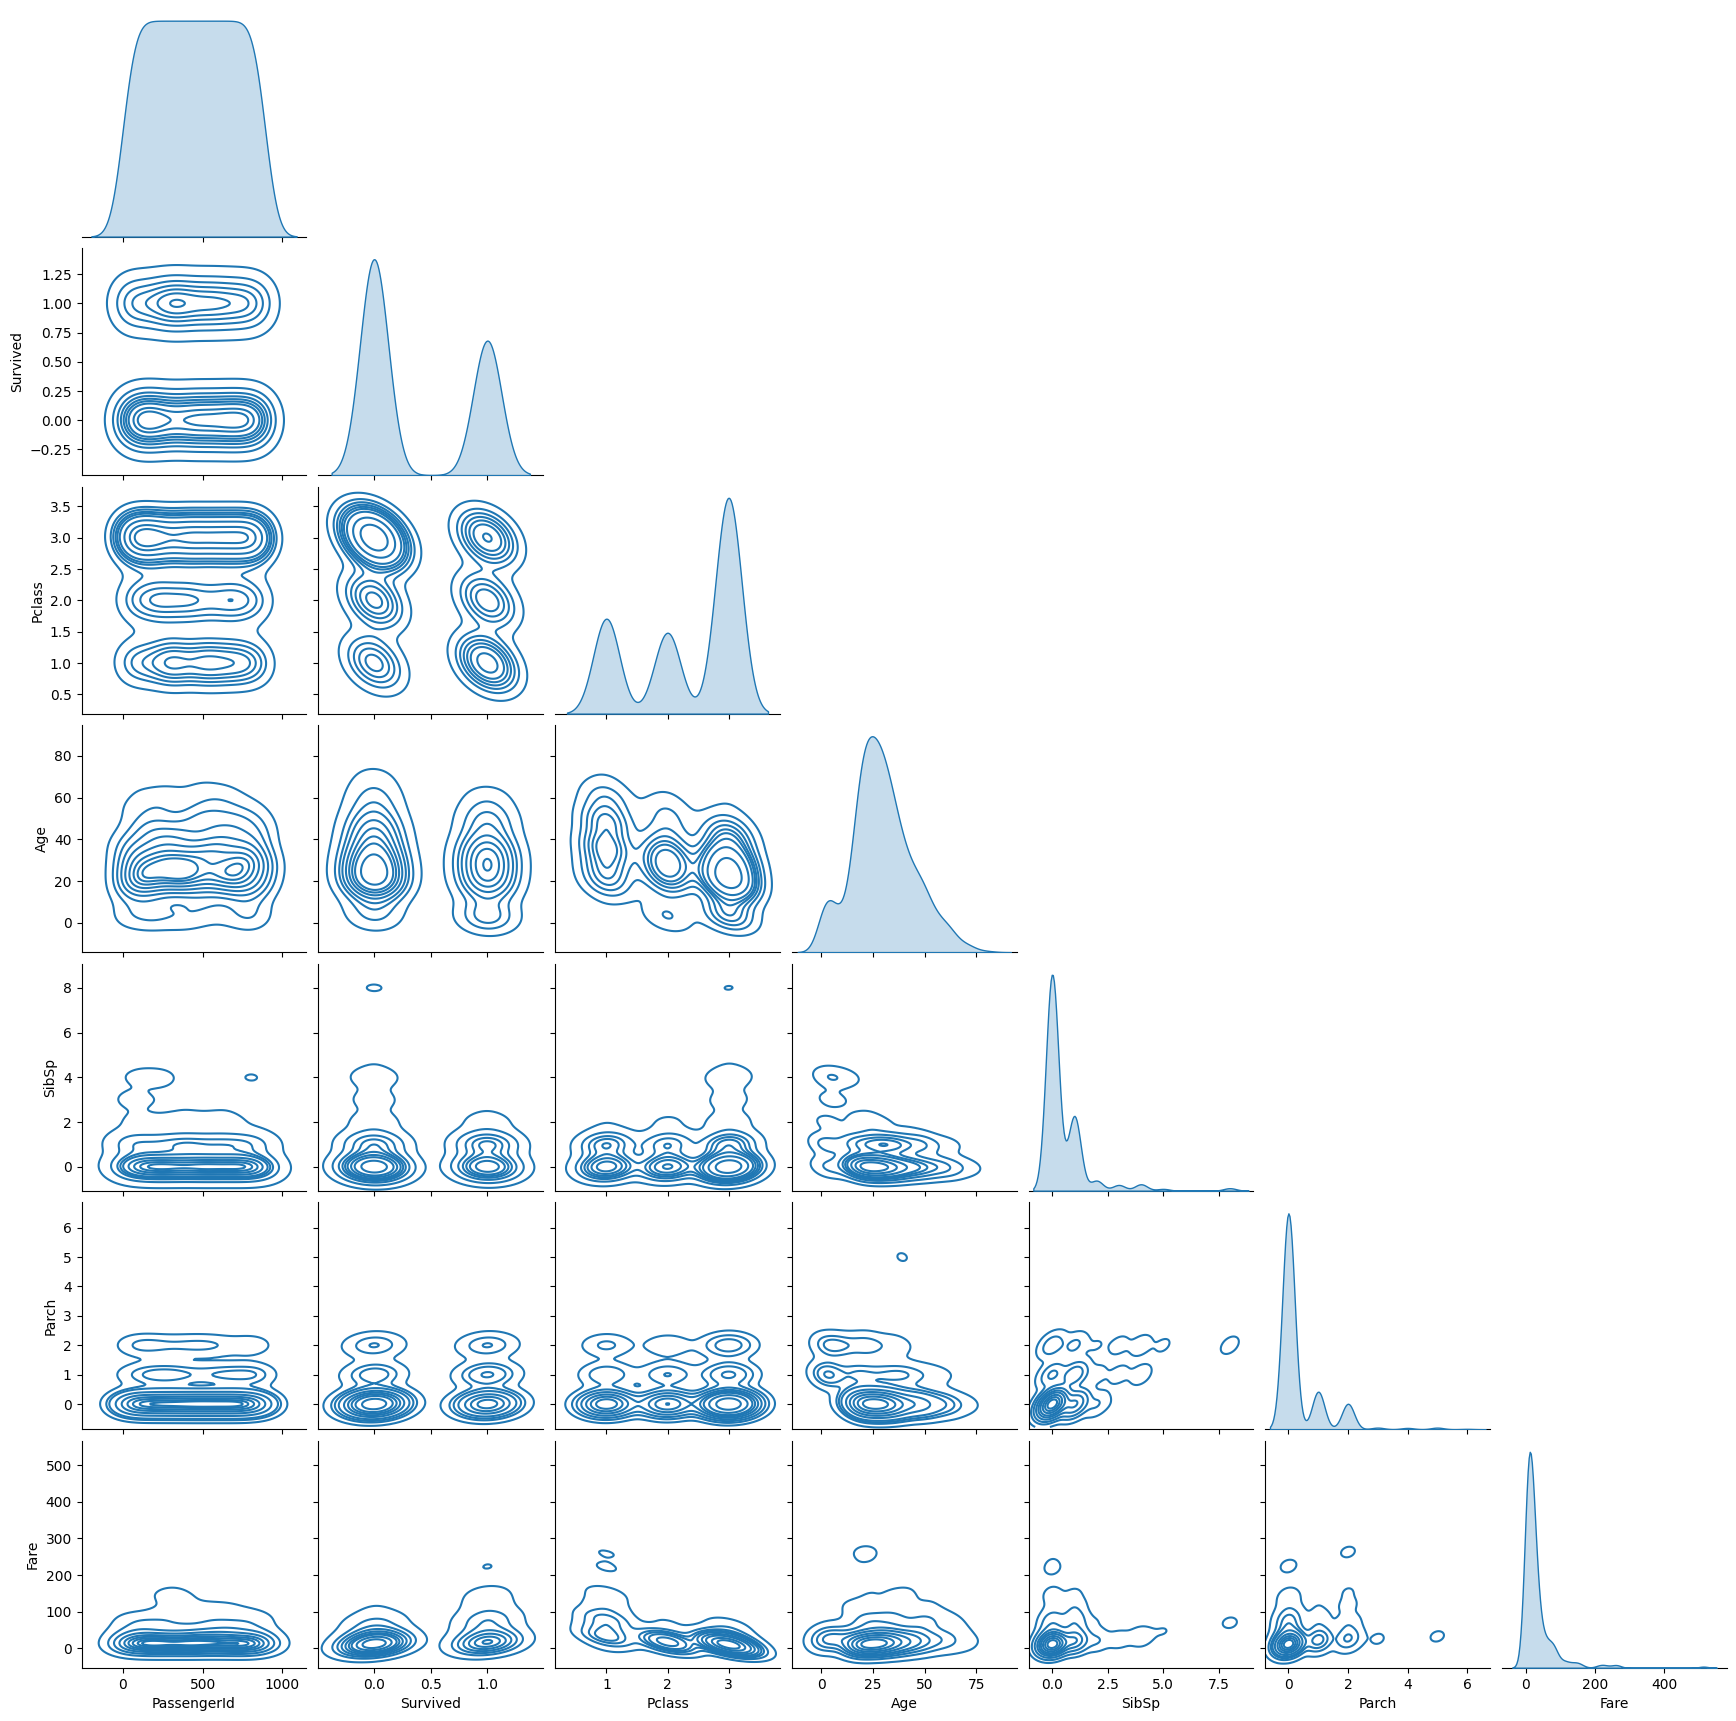

In [7]:
sns.pairplot(train_df, kind="kde", corner=True);

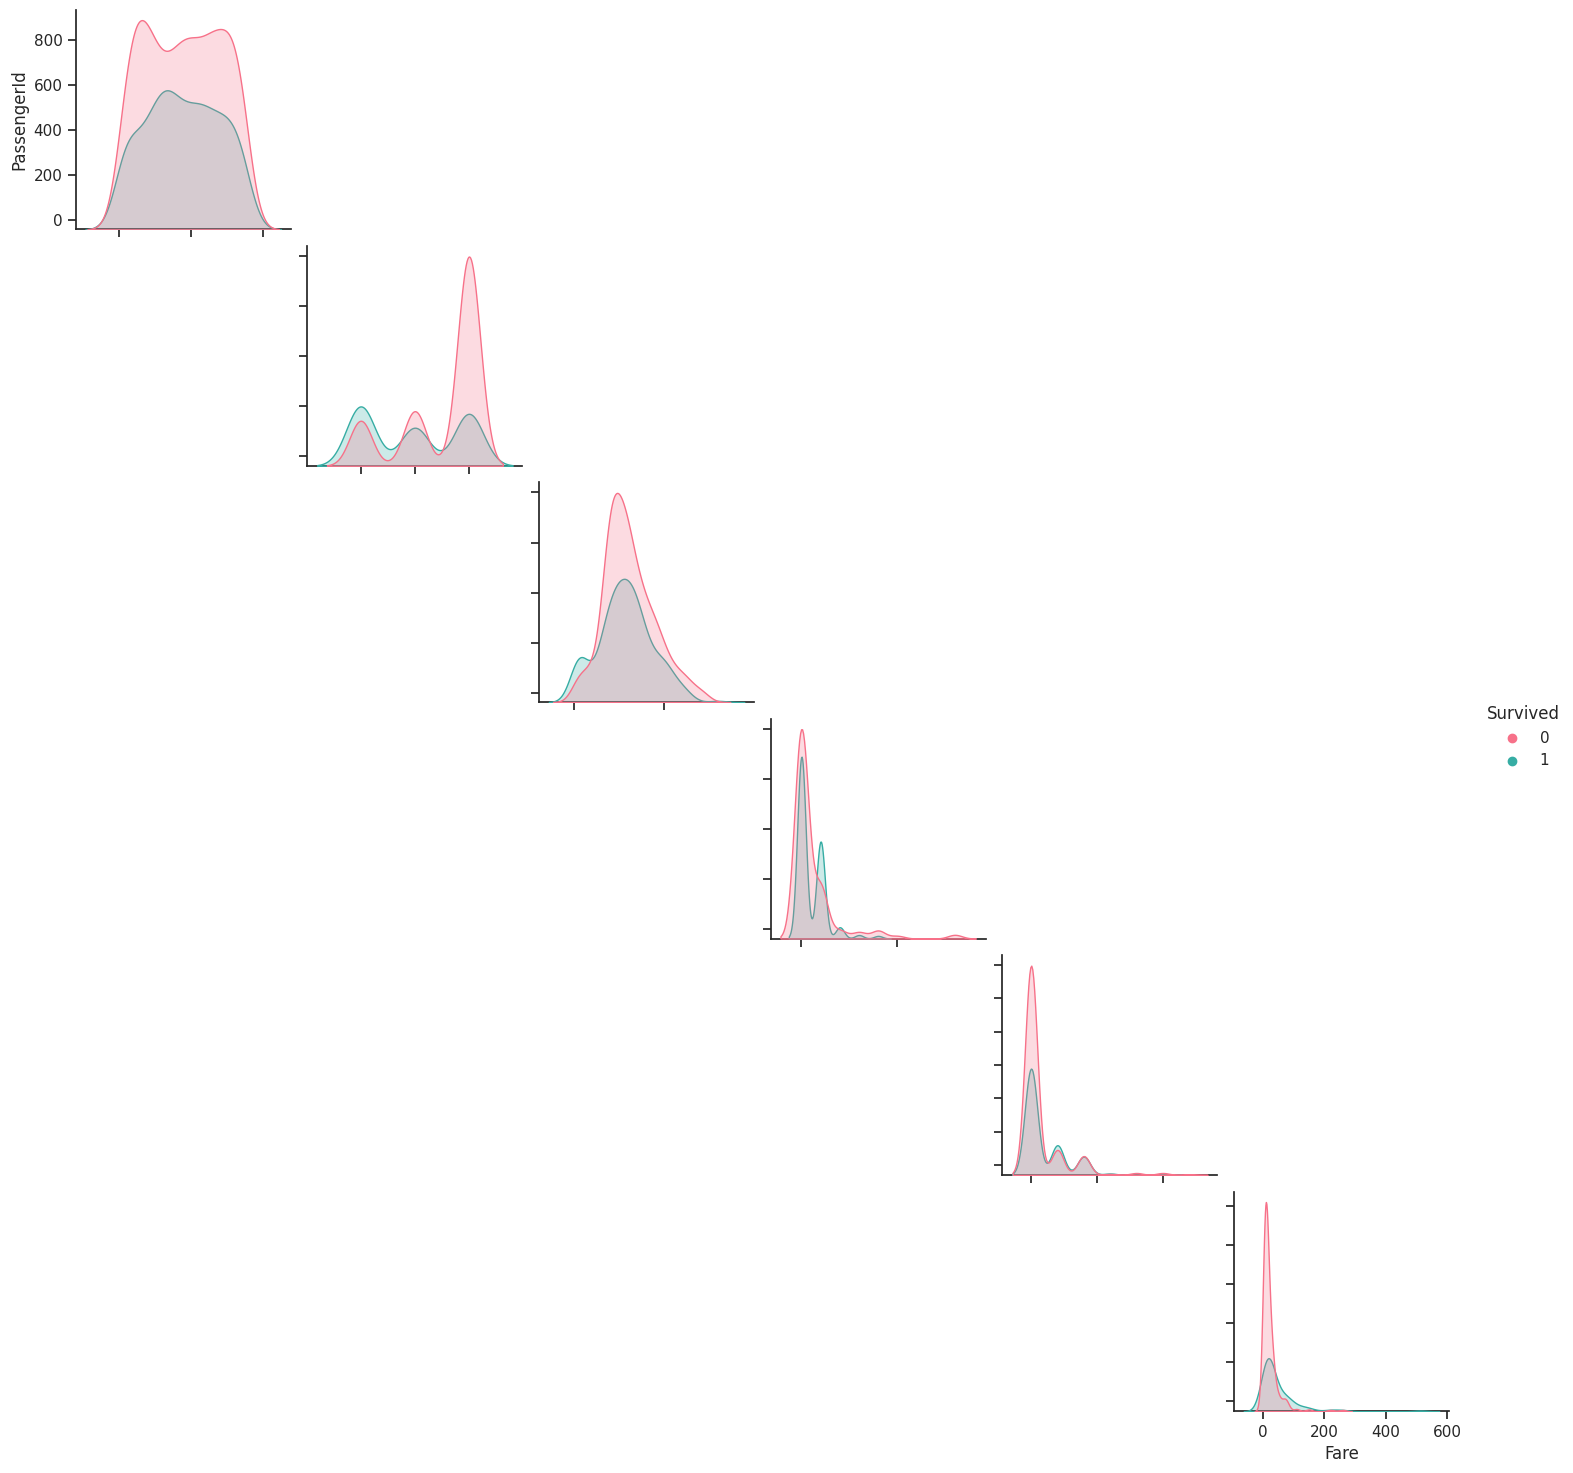

In [8]:
sns.set(style="ticks", color_codes=True)

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

g = sns.pairplot(train_df, hue="Survived", palette="husl")
g.map_upper(hide_current_axis);
g.map_lower(hide_current_axis);

## Scatterplots intrepret

The closer the data points come to forming a straight line when plotted, the higher the correlation between the two variables, or the stronger the relationship.

![correlation](asset/corre.png "scatter correlation")

If a relationship exists, the scatterplot indicates its direction and whether it is a linear or curved relationship.
Relationships between variables can be described in many ways: positive or negative, strong or weak, linear or nonlinear.

![correlation](asset/corre_2.png "scatter correlation")

A scatter plot can also be useful for identifying other patterns in data. We can divide data points into groups based on how closely sets of points cluster together. Scatter plots can also show if there are any unexpected gaps in the data and if there are any outlier points. This can be useful if we want to segment the data into different parts

![correlation](asset/corre_3.png "scatter correlation")

## What's in a name?

The first variable which catches my attention is passenger name because we can break it down into additional meaningful variables which can feed predictions or be used in the creation of additional new variables. For instance, passenger title is contained within the passenger name variable and we can use surname to represent families. Let’s do some feature engineering!

ref [here](https://www.kaggle.com/code/zuckgo/exploring-survival-on-the-titanic-python-version)

https://www.kaggle.com/code/mrisdal/exploring-survival-on-the-titanic

https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions



In [9]:
# Grab title from passenger names
def substrTitle(name):
    start = name.find(', ')
    end = name.find('.')
    return name[start+2:end]

train_df["Title"] = train_df.Name.map(substrTitle)

# Show title counts by sex
pd.crosstab(train_df.Sex,train_df.Title)

Title   Capt  Col  Don  Dr  Jonkheer  Lady  Major  Master  Miss  Mlle  Mme  \
Sex                                                                          
female     0    0    0   1         0     1      0       0   182     2    1   
male       1    2    1   6         1     0      2      40     0     0    0   

Title    Mr  Mrs  Ms  Rev  Sir  the Countess  
Sex                                           
female    0  125   1    0    0             1  
male    517    0   0    6    1             0

In [10]:
# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
train_df.loc[:,"Title"] = train_df["Title"].map(lambda x: x if x not in rare_title else 'Rare_Title')
train_df.loc[train_df.Title == 'Mlle',"Title"] = 'Miss'
train_df.loc[train_df.Title == 'Ms',"Title"] = 'Miss'
train_df.loc[train_df.Title == 'Mme',"Title"] = 'Mrs'

# Show title counts by sex again
pd.crosstab(train_df.Sex,train_df.Title)

Title   Master  Miss   Mr  Mrs  Rare_Title
Sex                                       
female       0   185    0  126           3
male        40     0  517    0          20

In [12]:
# Finally, grab surname from passenger name
def substrSurname(name):
    start = name.find('. ')
    return name[start+2:].strip()

train_df["Surname"] = train_df.Name.map(substrSurname)

print('We have', len(np.unique(train_df.Surname)), 'unique surnames. I would be interested to infer ethnicity based on surname --- another time.')

We have 799 unique surnames. I would be interested to infer ethnicity based on surname --- another time.


Class Imbalance?

C:\Users\fawwaz\AppData\Local\Temp\ipykernel_10824\3179165369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Survived'], kde=False, hist=True, bins=3);


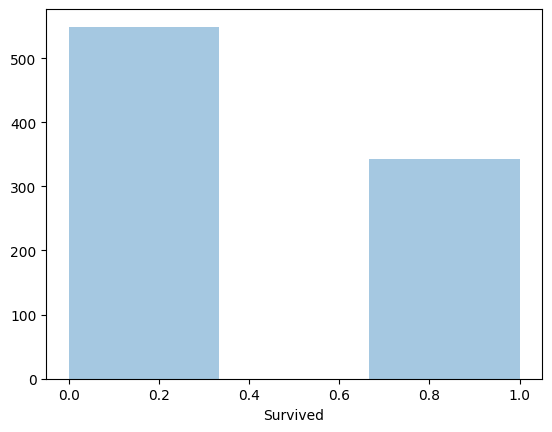

In [17]:
sns.distplot(train_df['Survived'], kde=False, hist=True, bins=3);

check https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca

https://www.linkedin.com/pulse/titanic-ml-evaluation-classification-models-belal-aboelkher/

https://www.kaggle.com/code/aselad/exploratory-data-analysis-on-the-titanic-dataset

